In [1]:
import os
import glob
import subprocess
import matplotlib.pyplot as plt

In [2]:
log_dir = '../test/logs/'
dot_log_files = glob.glob(os.path.join(log_dir, '*.log'))
len(dot_log_files)

134

In [3]:
for log_file in dot_log_files:
    try:
        os.remove(log_file)
    except Exception as e:
        print(f"Error removing {log_file}: {e}")

In [4]:
dot_txt_files = glob.glob(os.path.join(log_dir, '*.txt'))
len(dot_txt_files)

235

In [5]:
# 1 - specificity: filtered & stitched vamana (5 + 5)
# 2 - accuracy: vamana (upper bound) & filtered vamana & stitched vamana & vamana post processing (lower bound) (4)
# 3 - applications: hnsw & filtered hnsw & hnsw post processing (3)

class result_t:
    def __init__(self) -> None:
        self.v1 = [[], []]
        self.v2 = [[], [], [], []]
        self.v3 = [[], [], []]

sift_uni, sift_zipf = result_t(), result_t()
gist_uni, gist_zipf = result_t(), result_t()

In [6]:
for filename in os.listdir(log_dir):
    if filename.endswith(".txt"):
        if 'uni' in filename:
            if 'sift' in filename:
                filepath = os.path.join(log_dir, filename)
                
                recall = subprocess.run(f"grep 'recall:' {filepath} | awk '{{print $2}}'", stdout=subprocess.PIPE, shell=True)
                recall = recall.stdout.decode('utf-8').split('\n')
                recall = [float(v.strip()) for v in recall if v]

                qps = subprocess.run(f"grep 'Find neighbors:' {filepath} | awk '{{print $5}}'", stdout=subprocess.PIPE, shell=True)
                qps = qps.stdout.decode('utf-8').split('\n')
                qps = [float(v.strip()) for v in qps if v]

                if len(recall) != 17 or len(qps) != 17:
                    print(filename)
                    continue

                sift_uni.v1[0].append([(qps[i], recall[i]) for i in range(5)])
                sift_uni.v1[1].append([(qps[i], recall[i]) for i in range(5, 10)])
 
                sift_uni.v2[0].append((qps[10], recall[10]))       # vamana
                sift_uni.v2[1].append((qps[11], recall[11]))       # filtered vamana
                sift_uni.v2[2].append((qps[12], recall[12]))       # stitched vamana
                sift_uni.v2[3].append((qps[13], recall[13]))       # vamana post processing

                sift_uni.v3[0].append((qps[14], recall[14]))       # hnsw
                sift_uni.v3[1].append((qps[15], recall[15]))       # filtered hnsw
                sift_uni.v3[2].append((qps[16], recall[16]))       # hnsw post processing
            elif 'gist' in filename:
                filepath = os.path.join(log_dir, filename)
            
                recall = subprocess.run(f"grep 'recall:' {filepath} | awk '{{print $2}}'", stdout=subprocess.PIPE, shell=True)
                recall = recall.stdout.decode('utf-8').split('\n')
                recall = [float(v.strip()) for v in recall if v]

                qps = subprocess.run(f"grep 'Find neighbors:' {filepath} | awk '{{print $5}}'", stdout=subprocess.PIPE, shell=True)
                qps = qps.stdout.decode('utf-8').split('\n')
                qps = [float(v.strip()) for v in qps if v]

                if len(recall) != 17 or len(qps) != 17:
                    print(filename)
                    continue

                t = []
                for i in range(5):
                    t.append((qps[i], recall[i]))
                gist_uni.v1[0].append(t)
                t = []
                for i in range(5, 10):
                    t.append((qps[i], recall[i]))
                gist_uni.v1[1].append(t)

                gist_uni.v2[0].append((qps[10], recall[10]))       # vamana
                gist_uni.v2[1].append((qps[11], recall[11]))       # filtered vamana
                gist_uni.v2[2].append((qps[12], recall[12]))       # stitched vamana
                gist_uni.v2[3].append((qps[13], recall[13]))       # vamana post processing

                gist_uni.v3[0].append((qps[14], recall[14]))       # hnsw
                gist_uni.v3[1].append((qps[15], recall[15]))       # filtered hnsw
                gist_uni.v3[2].append((qps[16], recall[16]))       # hnsw post processing
        elif 'zipf' in filename:
            if 'sift' in filename:
                filepath = os.path.join(log_dir, filename)
                
                recall = subprocess.run(f"grep 'recall:' {filepath} | awk '{{print $2}}'", stdout=subprocess.PIPE, shell=True)
                recall = recall.stdout.decode('utf-8').split('\n')
                recall = [float(v.strip()) for v in recall if v]

                qps = subprocess.run(f"grep 'Find neighbors:' {filepath} | awk '{{print $5}}'", stdout=subprocess.PIPE, shell=True)
                qps = qps.stdout.decode('utf-8').split('\n')
                qps = [float(v.strip()) for v in qps if v]

                if len(recall) != 17 or len(qps) != 17:
                    print(filename)
                    continue

                t = []
                for i in range(5):
                    t.append((qps[i], recall[i]))
                sift_zipf.v1[0].append(t)
                t = []
                for i in range(5, 10):
                    t.append((qps[i], recall[i]))
                sift_zipf.v1[1].append(t)

                sift_zipf.v2[0].append((qps[10], recall[10]))       # vamana
                sift_zipf.v2[1].append((qps[11], recall[11]))       # filtered vamana
                sift_zipf.v2[2].append((qps[12], recall[12]))       # stitched vamana
                sift_zipf.v2[3].append((qps[13], recall[13]))       # vamana post processing

                sift_zipf.v3[0].append((qps[14], recall[14]))       # hnsw
                sift_zipf.v3[1].append((qps[15], recall[15]))       # filtered hnsw
                sift_zipf.v3[2].append((qps[16], recall[16]))       # hnsw post processing
            elif 'gist' in filename:
                filepath = os.path.join(log_dir, filename)
            
                recall = subprocess.run(f"grep 'recall:' {filepath} | awk '{{print $2}}'", stdout=subprocess.PIPE, shell=True)
                recall = recall.stdout.decode('utf-8').split('\n')
                recall = [float(v.strip()) for v in recall if v]

                qps = subprocess.run(f"grep 'Find neighbors:' {filepath} | awk '{{print $5}}'", stdout=subprocess.PIPE, shell=True)
                qps = qps.stdout.decode('utf-8').split('\n')
                qps = [float(v.strip()) for v in qps if v]

                if len(recall) != 17 or len(qps) != 17:
                    print(filename)
                    continue

                t = []
                for i in range(5):
                    t.append((qps[i], recall[i]))
                gist_zipf.v1[0].append(t)
                t = []
                for i in range(5, 10):
                    t.append((qps[i], recall[i]))
                gist_zipf.v1[1].append(t)

                gist_zipf.v2[0].append((qps[10], recall[10]))       # vamana
                gist_zipf.v2[1].append((qps[11], recall[11]))       # filtered vamana
                gist_zipf.v2[2].append((qps[12], recall[12]))       # stitched vamana
                gist_zipf.v2[3].append((qps[13], recall[13]))       # vamana post processing

                gist_zipf.v3[0].append((qps[14], recall[14]))       # hnsw
                gist_zipf.v3[1].append((qps[15], recall[15]))       # filtered hnsw
                gist_zipf.v3[2].append((qps[16], recall[16]))       # hnsw post processing

gist_zipf_k10_m64_ef170_efc150.txt
sift_uni_k10_m32_ef90_efc150.txt
sift_zipf_k10_m32_ef290_efc50.txt
gist_zipf_k10_m32_ef290_efc50.txt
sift_uni_k10_m32_ef290_efc50.txt
gist_uni_k10_m32_ef290_efc50.txt
sift_zipf_k10_m32_ef290_efc100.txt
gist_zipf_k10_m32_ef290_efc100.txt
sift_uni_k10_m32_ef290_efc100.txt
gist_uni_k10_m32_ef290_efc100.txt
sift_zipf_k10_m32_ef290_efc150.txt
gist_zipf_k10_m32_ef290_efc150.txt


In [7]:
colors = ['blue', 'orange', 'red', 'purple', 'green', 'gray']

specificities = [
    "100pc specificity",
    "75pc specificity",
    "50pc specificity",
    "25pc specificity",
    "1pc specificity"
]

subtitles = [
    "Uni-SIFT",
    "ZIPF-SIFT",
    "Uni-GIST",
    "ZIPF-GIST"
]

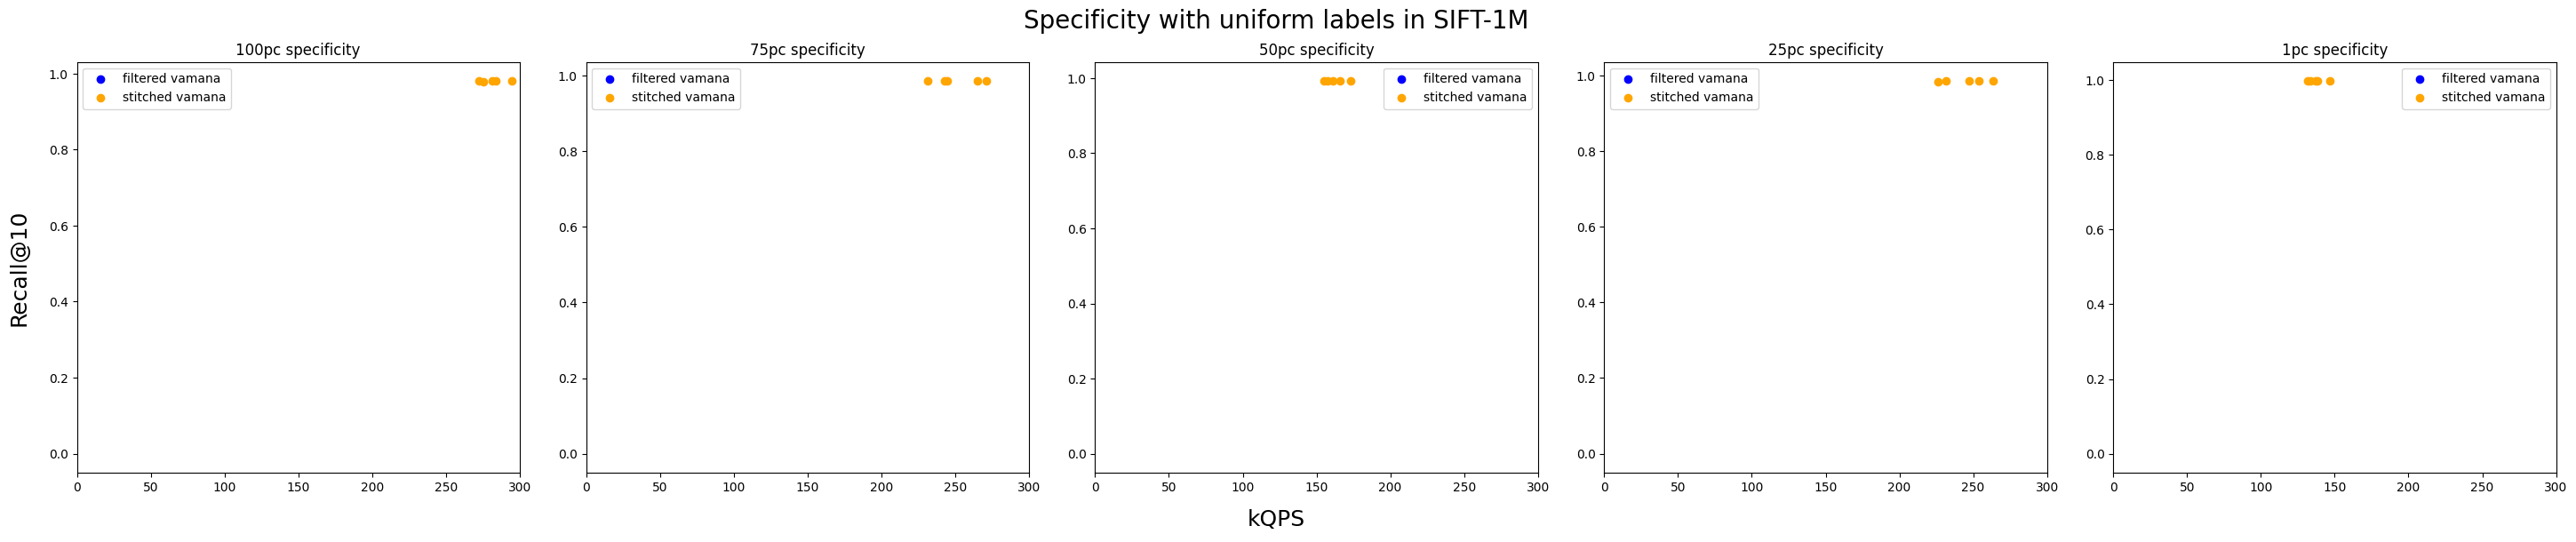

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(36, 6), gridspec_kw={'wspace': 0.15, 'hspace': 0.2})

for i in range(5):
    axs[i].scatter(*zip(*sift_uni.v1[0][i]), color=colors[0], label='filtered vamana')
    axs[i].scatter(*zip(*sift_uni.v1[1][i]), color=colors[1], label='stitched vamana')
    axs[i].set_title(specificities[i])
    axs[i].set_xlim(0, 300)
    axs[i].legend()

fig.suptitle('Specificity with uniform labels in SIFT-1M', fontsize=20)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=18)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=18)

output_path = "./figures/specificity_uniform_sift.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()

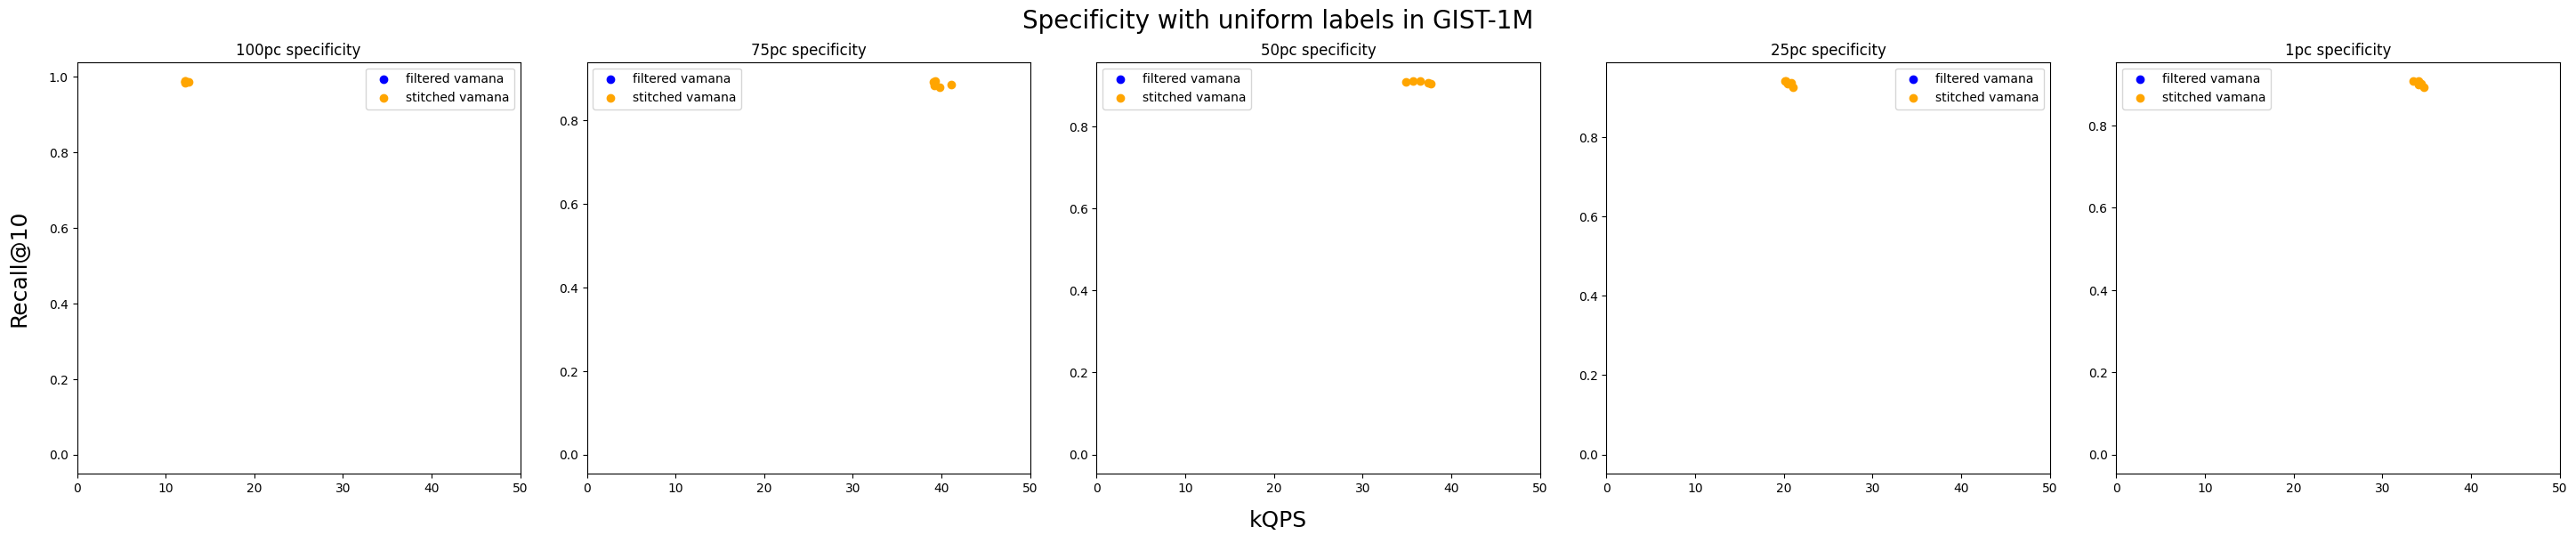

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(36, 6), gridspec_kw={'wspace': 0.15, 'hspace': 0.2})

for i in range(5):
    axs[i].scatter(*zip(*gist_uni.v1[0][i]), color=colors[0], label='filtered vamana')
    axs[i].scatter(*zip(*gist_uni.v1[1][i]), color=colors[1], label='stitched vamana')
    axs[i].set_title(specificities[i])
    axs[i].set_xlim(0, 50)
    axs[i].legend()

fig.suptitle('Specificity with uniform labels in GIST-1M', fontsize=20)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=18)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=18)

output_path = "./figures/specificity_uniform_gist.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()

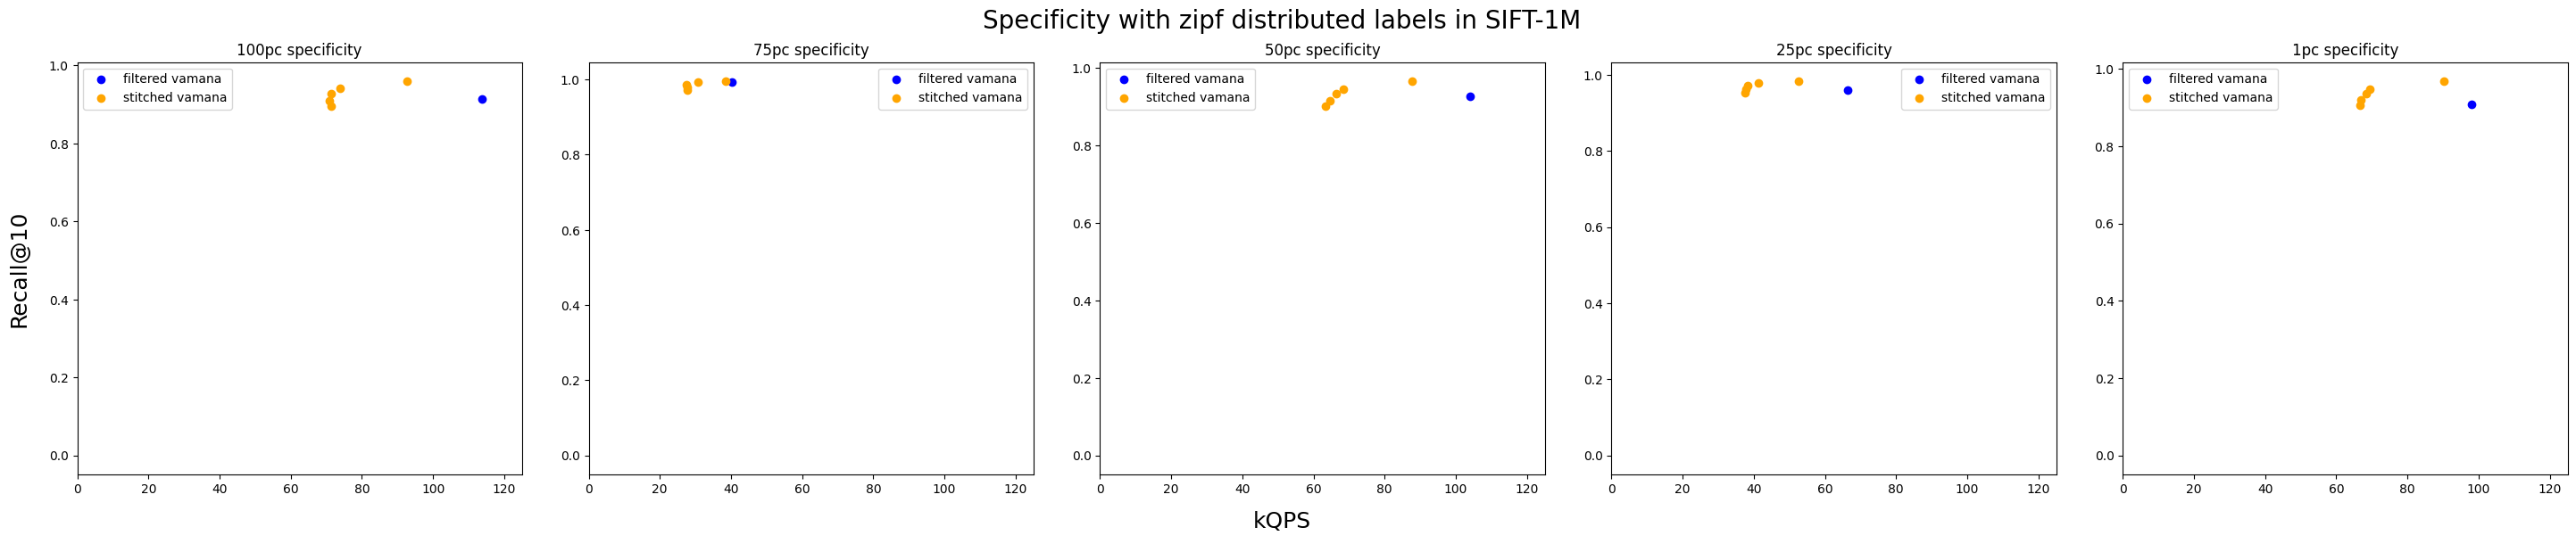

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(36, 6), gridspec_kw={'wspace': 0.15, 'hspace': 0.2})

for i in range(5):
    axs[i].scatter(*zip(*sift_zipf.v1[0][i]), color=colors[0], label='filtered vamana')
    axs[i].scatter(*zip(*sift_zipf.v1[1][i]), color=colors[1], label='stitched vamana')
    axs[i].set_title(specificities[i])
    axs[i].set_xlim(0, 125)
    axs[i].legend()

fig.suptitle('Specificity with zipf distributed labels in SIFT-1M', fontsize=20)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=18)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=18)

output_path = "./figures/specificity_zipf_sift.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()

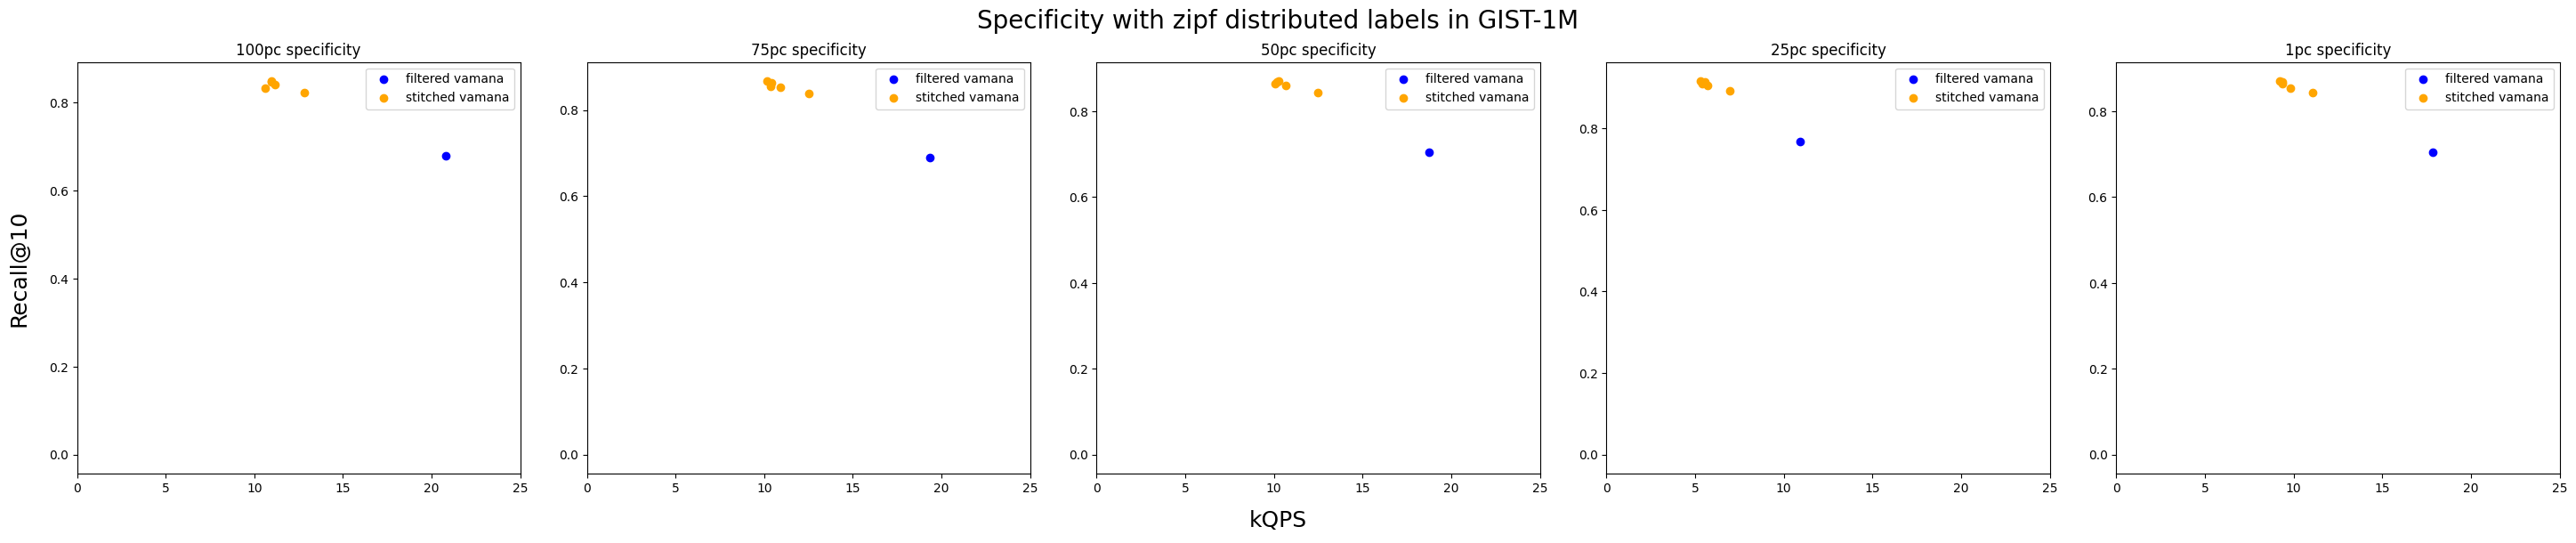

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(36, 6), gridspec_kw={'wspace': 0.15, 'hspace': 0.2})

for i in range(5):
    axs[i].scatter(*zip(*gist_zipf.v1[0][i]), color=colors[0], label='filtered vamana')
    axs[i].scatter(*zip(*gist_zipf.v1[1][i]), color=colors[1], label='stitched vamana')
    axs[i].set_title(specificities[i])
    axs[i].set_xlim(0, 25)
    axs[i].legend()

fig.suptitle('Specificity with zipf distributed labels in GIST-1M', fontsize=20)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=18)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=18)

output_path = "./figures/specificity_zipf_gist.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()

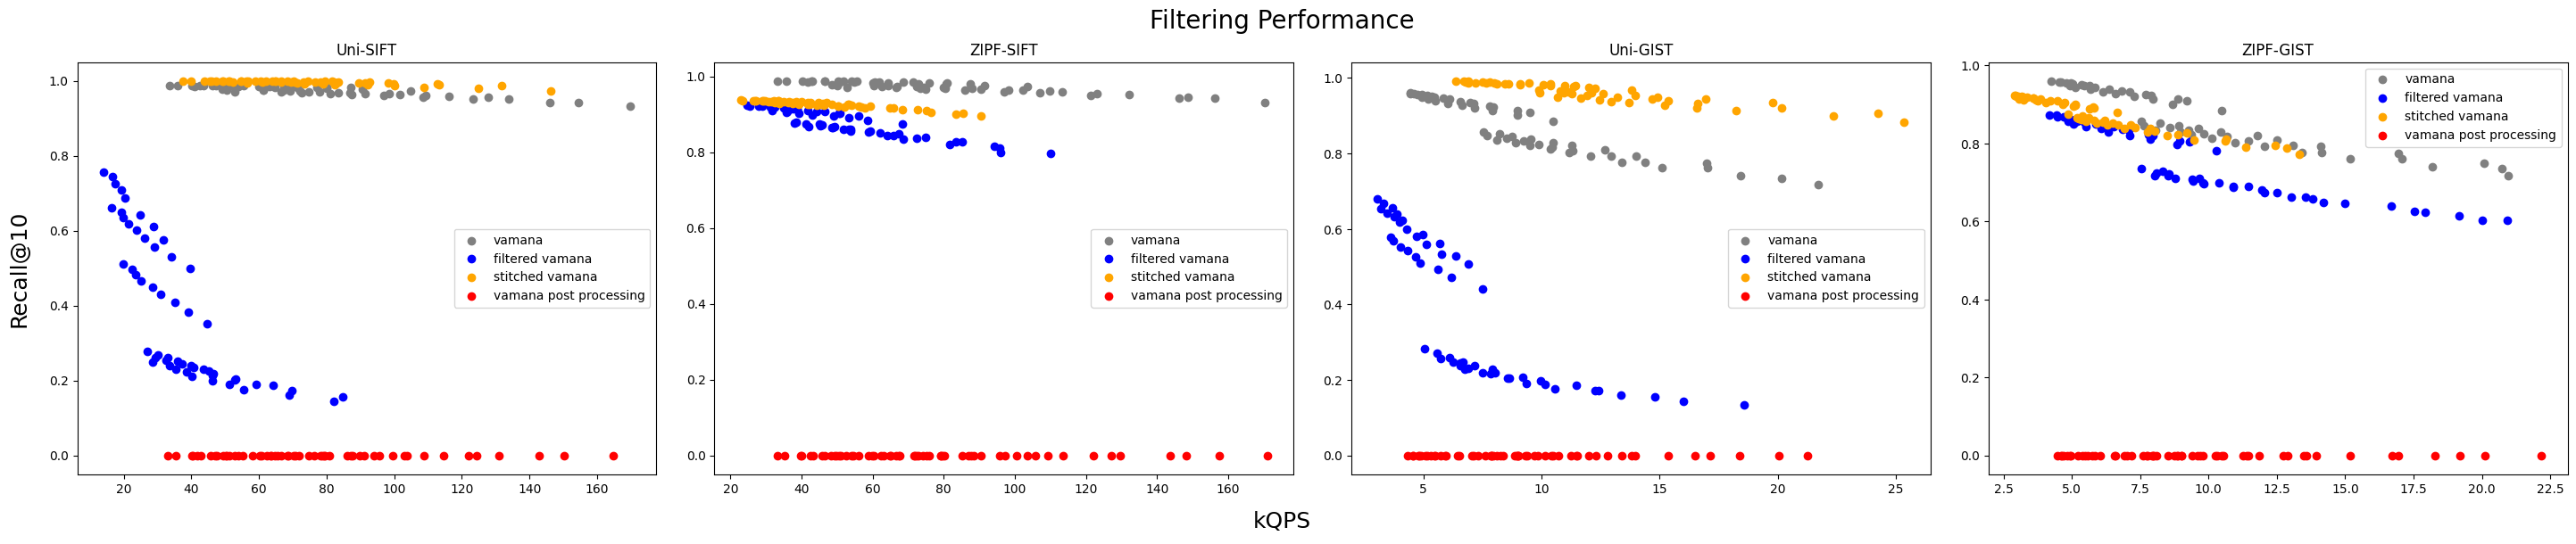

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(36, 6), gridspec_kw={'wspace': 0.1, 'hspace': 0.2})

axs[0].scatter(*zip(*sift_uni.v2[0]), color=colors[-1], label='vamana')
axs[0].scatter(*zip(*sift_uni.v2[1]), color=colors[0], label='filtered vamana')
axs[0].scatter(*zip(*sift_uni.v2[2]), color=colors[1], label='stitched vamana')
axs[0].scatter(*zip(*sift_uni.v2[3]), color=colors[2], label='vamana post processing')
axs[0].set_title(subtitles[0])
axs[0].legend()

axs[1].scatter(*zip(*sift_zipf.v2[0]), color=colors[-1], label='vamana')
axs[1].scatter(*zip(*sift_zipf.v2[1]), color=colors[0], label='filtered vamana')
axs[1].scatter(*zip(*sift_zipf.v2[2]), color=colors[1], label='stitched vamana')
axs[1].scatter(*zip(*sift_zipf.v2[3]), color=colors[2], label='vamana post processing')
axs[1].set_title(subtitles[1])
axs[1].legend()

axs[2].scatter(*zip(*gist_uni.v2[0]), color=colors[-1], label='vamana')
axs[2].scatter(*zip(*gist_uni.v2[1]), color=colors[0], label='filtered vamana')
axs[2].scatter(*zip(*gist_uni.v2[2]), color=colors[1], label='stitched vamana')
axs[2].scatter(*zip(*gist_uni.v2[3]), color=colors[2], label='vamana post processing')
axs[2].set_title(subtitles[2])
axs[2].legend()

axs[3].scatter(*zip(*gist_zipf.v2[0]), color=colors[-1], label='vamana')
axs[3].scatter(*zip(*gist_zipf.v2[1]), color=colors[0], label='filtered vamana')
axs[3].scatter(*zip(*gist_zipf.v2[2]), color=colors[1], label='stitched vamana')
axs[3].scatter(*zip(*gist_zipf.v2[3]), color=colors[2], label='vamana post processing')
axs[3].set_title(subtitles[3])
axs[3].legend()

fig.suptitle('Filtering Performance', fontsize=20)
# fig.suptitle('kQPS', fontsize=16, x=0.5, y=0.04)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=18)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=18)

output_path = "./figures/comprehensive_performance.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()

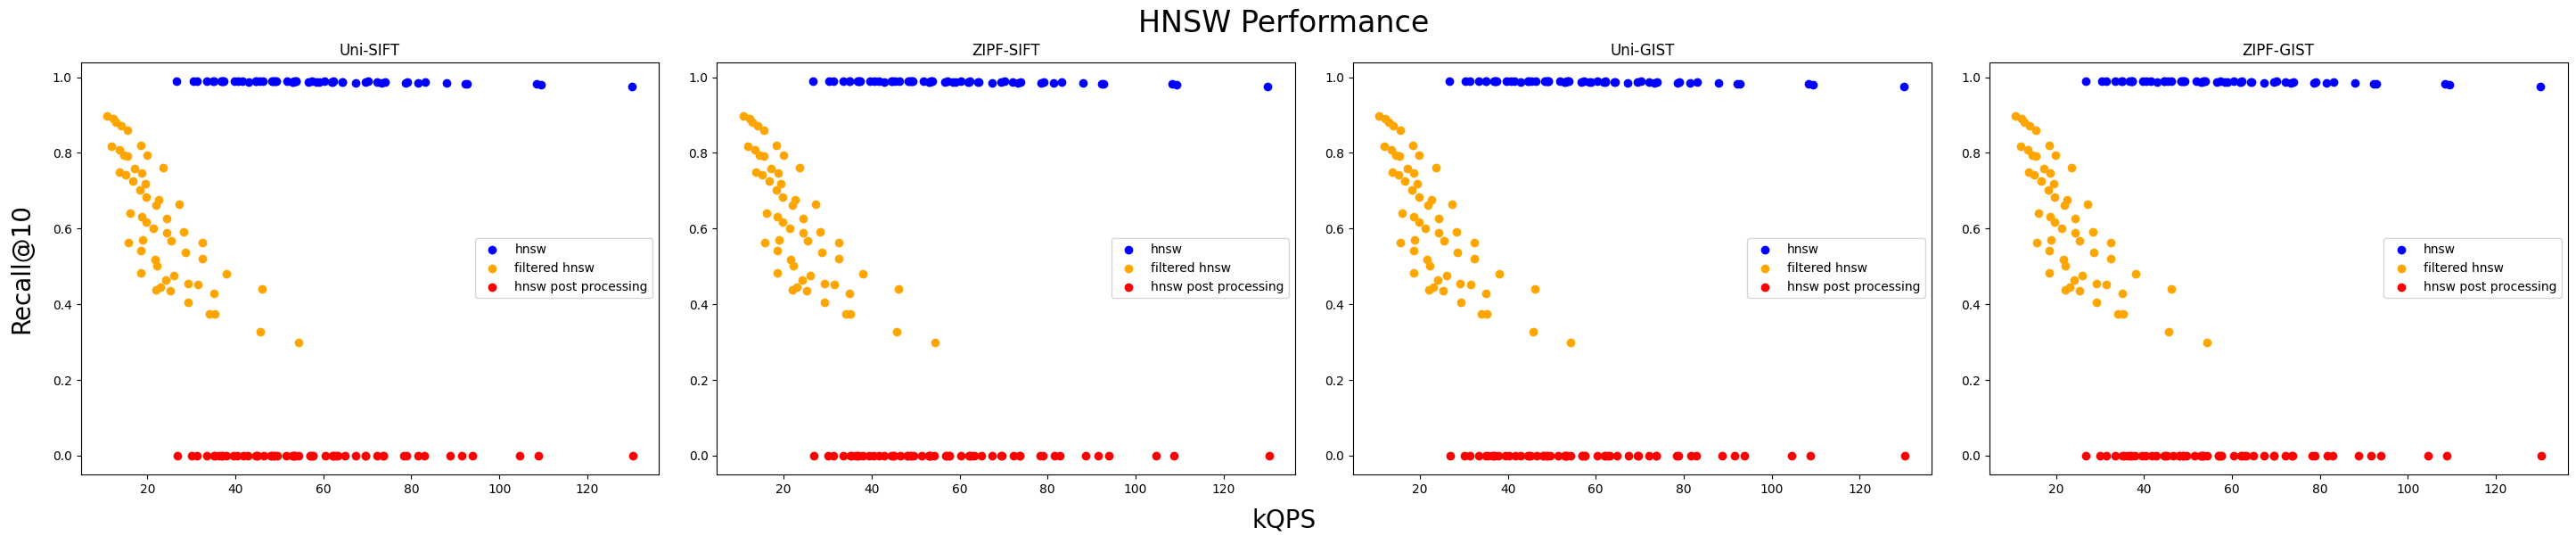

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(36, 6), gridspec_kw={'wspace': 0.1, 'hspace': 0.2})

axs[0].scatter(*zip(*sift_uni.v3[0]), color=colors[0], label='hnsw')
axs[0].scatter(*zip(*sift_uni.v3[1]), color=colors[1], label='filtered hnsw')
axs[0].scatter(*zip(*sift_uni.v3[2]), color=colors[2], label='hnsw post processing')
axs[0].set_title(subtitles[0])
axs[0].legend()

axs[1].scatter(*zip(*sift_uni.v3[0]), color=colors[0], label='hnsw')
axs[1].scatter(*zip(*sift_uni.v3[1]), color=colors[1], label='filtered hnsw')
axs[1].scatter(*zip(*sift_uni.v3[2]), color=colors[2], label='hnsw post processing')
axs[1].set_title(subtitles[1])
axs[1].legend()

axs[2].scatter(*zip(*sift_uni.v3[0]), color=colors[0], label='hnsw')
axs[2].scatter(*zip(*sift_uni.v3[1]), color=colors[1], label='filtered hnsw')
axs[2].scatter(*zip(*sift_uni.v3[2]), color=colors[2], label='hnsw post processing')
axs[2].set_title(subtitles[2])
axs[2].legend()

axs[3].scatter(*zip(*sift_uni.v3[0]), color=colors[0], label='hnsw')
axs[3].scatter(*zip(*sift_uni.v3[1]), color=colors[1], label='filtered hnsw')
axs[3].scatter(*zip(*sift_uni.v3[2]), color=colors[2], label='hnsw post processing')
axs[3].set_title(subtitles[3])
axs[3].legend()

fig.suptitle('HNSW Performance', fontsize=24)
# fig.suptitle('kQPS', fontsize=16, x=0.5, y=0.04)
fig.text(x=0.5, y=0.01, s='kQPS', ha='center', fontsize=20)
axs[2].set_xlabel(' ', labelpad=12, fontsize=20)
axs[0].set_ylabel('Recall@10', labelpad=15, fontsize=20)

output_path = "./figures/hnsw_applications.pdf"
plt.savefig(output_path, format='pdf', dpi=600)

plt.show()